<a href="https://colab.research.google.com/github/NicolasToncheis/Manufatura/blob/main/Din%C3%A2mica_Prensa-Joelho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Item 3) Implementação computacional da resolução
numérica das equações dinâmicas

In [1]:
import numpy as np
from numpy import pi, sin, cos
from scipy.integrate import odeint
from scipy.optimize import fsolve
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.io import savemat

# Constantes:
# Inércia:
Mm = 100
Mv = 1000
Iv = 8.5

#Comprimentos:
Y = 1.35
X = 3.5
R = 0.5
T = 3
B1 = 1.55
B2 = 2.4
g = 9.81

# Equação de circuito:
def equ_circuito(V,q):
  O = V[0]
  C = V[1]
  A = V[2]
  H = V[3]
  f = np.empty(4)
  f[0] = -R*cos(q) - T*cos(O) - B1*sin(C) + X
  f[1] = -R*sin(q) + T*sin(O) + B1*cos(C) - Y
  f[2] =  B1*sin(C) - B2*sin(A)
  f[3] = -B2*cos(A) - B1*cos(C) + H + Y
  return f

def cinema(q,qp):
  global V0
  V = fsolve(equ_circuito,V0,q)
  V0 = V
  [O,C,A,H] = V

  J = np.array([[T*sin(O),-B1*cos(C),0,0],
                 [T*cos(O),-B1*sin(C),0,0],
                 [0,B1*cos(C),-B2*cos(A),0],
                 [0,B1*sin(C),B2*sin(A),1]])
  dfdq = np.array([[R*sin(q)],[-R*cos(q)],[0],[0]])
  K = np.linalg.solve(J,-dfdq)
  [[KO],[KC],[KA],[KH]] = K

  dJdq = np.array([[T*KO*cos(O), B1*KC*sin(C), 0, 0],
                   [-T*KO*sin(O), -B1*KC*cos(C), 0, 0],
                   [0, -B1*KC*sin(C), B2*KA*sin(A), 0],
                   [0, B1*KC*cos(C), B2*KA*cos(A), 0]])
  dfqdq = np.array([[R*cos(q)],[R*sin(q)],[0],[0]])
  L = np.linalg.solve(J,-dfqdq-dJdq.dot(K))
  [[LO],[LC],[LA],[LH]] = L

  KM = KH
  LM = LH

  return KM, LM

def dinamica(y,t):
  q = y[0]
  qp = y[1]
  KM, LM = cinema(q,qp)
  F = 5e5*cos(0.48*t)
  qpp = (F*KM + Mv - Mm*g*KM -(Mm*KM*LM)*q**2)/(Mm*KM**2 + Iv)

  yp = np.empty(2)
  yp[0] = qp
  yp[1] = qpp
  return np.array(yp)

t = np.linspace(0,5,200)
y0 = np.array([pi/4,3.67])
V0 = np.array([pi/5,pi/4.5,pi/9,2.55])
sol = odeint(dinamica,y0,t)

savemat('primárias.dat',{'t':t,'q':sol})

Item 4)Gráfico das variáveis, velocidades e
acelerações primárias em um ciclo completo
da prensa.

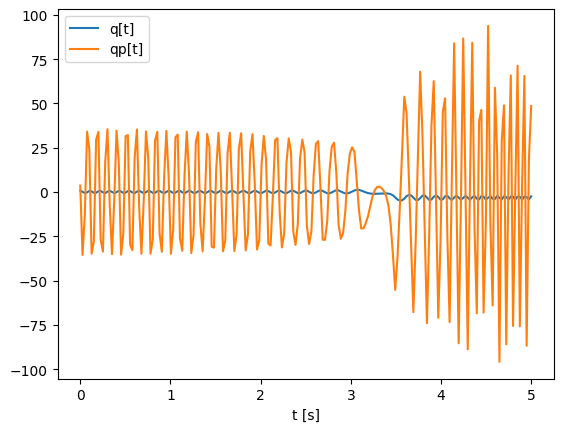

In [2]:
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat;

dados = loadmat('primárias.dat');
t = dados['t'][0]
q = dados['q']

plt.plot(t, sol[:,0], label = 'q[t]');
plt.plot(t, sol[:,1], label = 'qp[t]');
plt.legend();
plt.xlabel('t [s]');
plt.show()

Item 5) Gráfico do deslocamento, velocidade e
aceleração do martelo para um ciclo completo
da prensa.

In [18]:
import numpy as np
from numpy import pi, sin, cos
from scipy.optimize import fsolve;
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat;

#Comprimentos:
Y = 1.35
X = 3.5
R = 0.5
T = 3
B1 = 1.55
B2 = 2.4

def equ_circuito(V,q):
  O = V[0]
  C = V[1]
  A = V[2]
  H = V[3]
  f = np.empty(4)
  f[0] = -R*cos(q) - T*cos(O) - B1*sin(C) + X
  f[1] = -R*sin(q) + T*sin(O) + B1*cos(C) - Y
  f[2] =  B1*sin(C) - B2*sin(A)
  f[3] = -B2*cos(A) - B1*cos(C) + H + Y
  return f

def interesse(q):
  PM = np.array([-X],[-H])
  return PM

dados = loadmat('primárias.dat');
t = dados['t'][0]
q = dados['q']
n = q.shape[0]

V0 = np.array([pi/5,pi/4.5,pi/9,2.55])
V1 = np.array((n,4))
PMV = np.empty((n,2))

j = 0
for qi in q[:,0]:
	V1[j,:] = fsolve(equ_circuito, V0, qi)
	V0 = V1[j,:]
  PMV[j,:] = interesse(qi)
	j += 1

plt.plot(PMV[:,0], PMV[:,1], label = 'PMV')
plt.legend();
plt.xlabel('X')
plt.xlabel('Y')
plt.axis('equal')
plt.show()

savemat('animar.dat',{'n': n, 'V1':V1, 'PMV':PMV})

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 44)

Item 7) Animação da prensa para um ou mais ciclos
de funcionamento.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML

fig, ax = plt.subplots()

p1 = ax.scatter([], [], c='#f4ebb7')
p2 = ax.scatter([], [], c='#a7ebb7')
p3 = ax.scatter([], [], c='#a761b7')
p4 = ax.scatter([],[], c='#4f8aa8')
pf = ax.scatter([], [], c='828282')

c1, = ax.plot([], [], c='#f4ebb7')
c2, = ax.plot([], [], c='#a7ebb7')
c3, = ax.plot([], [], c='#a761b7')
c4, = ax.plot([], [], c='#4f8aa8')

ax.axis('equal')

ax.set_xlim(-0.05, 0.5)
ax.set_ylim(-0.1, 0.40)


def update(j):
	a = 0.004
	b = 0.002

	# Desenha cursor 1:
	p1x = [S1[j,0]-a, S1[j,0]+a, S1[j,0]+a, S1[j,0]-a, S1[j,0]-a]
	p1y = [b, b, -b, -b, b]
	c1.set_data(p1x, p1y)

	# Desenha cursor 2:
	p2x = [-b, b, b, -b, -b]
	p2y = [S1[j,1]+a, S1[j,1]+a, S1[j,1]-a, S1[j,1]-a, S1[j,1]+a]
	c2.set_data(p2x, p2y)

	# Desenha corpo 3:
	p3x = [S1[j,0], 0, Pf[j,0], S1[j,0]]
	p3y = [0, S1[j,1], Pf[j,1], 0]
	c3.set_data(p3x, p3y)

  p4x = [S1[j,0], 0, Pf[j,0], S1[j,0]]
	p4y = [0, S1[j,1], Pf[j,1], 0]
	c4.set_data(p4x, p4y)

	p1.set_offsets([S1[j,0], 0])
	p2.set_offsets([0, S1[j,1]])
	p3.set_offsets(P3[j,:])
  p4.set_offsets()
	pf.set_offsets(Pf[j,:])
	return c1, c2, c3, p1, p2, p3, pf

dados = loadmat('animar.dat');
n = dados['n']
V1 = dados['V1'
PMV = dados['PMV']

ani = FuncAnimation(fig, update, frames = np.arange(n),
                    blit=True, interval = 50)
rc('animation', html='jshtml')
ani